#Exploratory Data Analysis

##Neighborhoods

In [171]:
from pymongo import MongoClient
import pandas as pd
import pickle    # For sample listing
from bs4 import BeautifulSoup    # For sample listing
import json

pd.options.display.mpl_style = 'default'    # This makes things pretty!
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
client = MongoClient()
db = client['airbnb']
hood_coll = db['neighborhoods']
search_coll = db['search']
listing_coll = db['listings']

In [5]:
hood_df = pd.DataFrame(list(hood_coll.find({},{'pickle':0,'requests_meta':0})))
hood_df.head()

,_id,city,city_id,content,data_bbox,data_x,data_y,description,dt,having_a_car,headline,neighborhood,neighboring_hoods,public_trans,similar_hoods,tags,time,traits,url
0,0,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.77316124717365,-122.43867913456722],[37.7...",-122.433850,37.776497,"Centered on its namesake park, Alamo Square pr...",2015-06-15 18:50:29.851000,Possible,"Feel right at home in this central, residentia...",Alamo Square,"[Western Addition/NOPA, Lower Haight, Hayes Va...",Possible,"[potrero-hill, bernal-heights, noe-valley]","[painted ladies, picturesque, views, colorful ...",1.434394e+09,"[Loved by San Franciscans, Stunning Views, Tou...",https://www.airbnb.com/locations/san-francisco...
1,1,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.707125302005934,-122.40811768178543],[37....",-122.385751,37.730901,Bayview's determined community continues to sp...,2015-06-15 18:50:32.790000,Easy,This industrial neighborhood's graffiti-clad b...,Bayview,"[Dogpatch, Portola, Potrero Hill, Visitacion V...",Possible,"[visitacion-valley, excelsior, tenderloin]","[shipyard, revitalizing, waterfront, sunny, sk...",1.434394e+09,"[Artsy, Peace & Quiet]",https://www.airbnb.com/locations/san-francisco...
2,2,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.73161432156119,-122.4336890756706],[37.74...",-122.416407,37.739872,"Outdoor enthusiasts, indoor bookworms, and pet...",2015-06-15 18:50:36.265000,Easy,Whether you're people-friendly or pet-friendly...,Bernal Heights,"[Glen Park, Mission Terrace, Portola, Potrero ...",Possible,"[potrero-hill, noe-valley, dogpatch]","[charming, cortland, far from downtown, lesbia...",1.434394e+09,"[Stunning Views, Peace & Quiet, Loved by San F...",https://www.airbnb.com/locations/san-francisco...
3,3,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.790328234954075,-122.41057147360783],[37....",-122.407279,37.794901,As North America's oldest and largest Chinatow...,2015-06-15 18:50:39.552000,Difficult,"If you're up for its intense crowds, sights, a...",Chinatown,"[North Beach, Downtown, Financial District, Te...",Easy,"[mission-district, downtown, financial-district]","[tourists, colors, historic, cuisine, alleys, ...",1.434394e+09,"[Touristy, Shopping, Dining]",https://www.airbnb.com/locations/san-francisco...
4,4,san-francisco,1,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[37.77418243823566,-122.42221226073246],[37.7...",-122.418076,37.779467,Home to San Francisco's City Hall and surround...,2015-06-15 18:50:42.693000,Difficult,"Soak up some culture in Civic Center, home to ...",Civic Center,"[Tenderloin, Hayes Valley, Western Addition/NO...",Easy,"[glen-park, noe-valley, south-beach]","[symphony, ballet, museum, opera, rallies, pol...",1.434394e+09,[Great Transit],https://www.airbnb.com/locations/san-francisco...


In [6]:
hood_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 19 columns):
_id                  102 non-null int64
city                 102 non-null object
city_id              102 non-null int64
content              102 non-null object
data_bbox            102 non-null object
data_x               102 non-null float64
data_y               102 non-null float64
description          102 non-null object
dt                   102 non-null datetime64[ns]
having_a_car         101 non-null object
headline             102 non-null object
neighborhood         102 non-null object
neighboring_hoods    102 non-null object
public_trans         101 non-null object
similar_hoods        102 non-null object
tags                 102 non-null object
time                 102 non-null float64
traits               102 non-null object
url                  102 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(13)
memory usage: 15.9+ KB


### How many hoods do we have in each city?

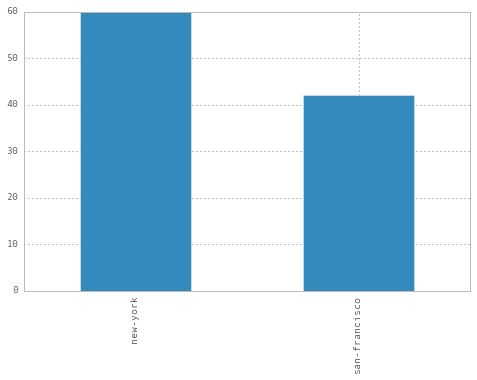

In [7]:
hood_df['city'].value_counts().plot(kind='bar', figsize=(8,5))
plt.show()

###What is the breakdown of public trans & having a car in each city?

In [8]:
pub_trans_df = hood_df.groupby(by=['city', 'public_trans']).count()[['_id']]
print pub_trans_df

car_df = hood_df.groupby(by=['city', 'having_a_car']).count()[['_id']]
print car_df

                            _id
city          public_trans     
new-york      Difficult       1
              Easy           52
              Possible        6
san-francisco Difficult       2
              Easy           19
              Possible       21
                            _id
city          having_a_car     
new-york      Difficult      36
              Easy            2
              Possible       21
san-francisco Difficult      14
              Easy           12
              Possible       16


In [19]:
# Note: there was at least 1 hood that didn't have Public Trans or Transit information. 
# What hood is that?

hood_df[hood_df['public_trans'].isnull()]

,_id,city,city_id,content,data_bbox,data_x,data_y,description,dt,having_a_car,headline,neighborhood,neighboring_hoods,public_trans,similar_hoods,tags,time,traits,url
52,55,new-york,2,"\n\n\n<!DOCTYPE html>\n<html lang=""en"" xmlns:...","[[40.66336350880069,-73.96441236614714],[40.68...",-73.939877,40.671626,Home to many of Brooklyn's museums and boastin...,2015-06-15 18:53:19.142000,NaN,"Get a taste of how cool Crown Heights can be, ...",Crown Heights,"[Brooklyn, Prospect Heights, Lefferts Garden, ...",NaN,[],"[caribbean, cheap, accessible, tree-lined, noi...",1.434394e+09,[],https://www.airbnb.com/locations/new-york/crow...


Crown Heights does NOT have transit/parking information. It also has the word "subway" spelled incorrectly on the page.

"Times Square: 37 minutes by ***subqay***"

source: https://www.airbnb.com/locations/new-york/crown-heights

###What traits does AirBnB label their neighborhoods?

In [9]:
#Total
from collections import Counter
traits = [item for sublist in hood_df['traits'] for item in sublist]
sorted(Counter(traits).items(), key=lambda x: x[1], reverse=True)

[(u'Dining', 54),
 (u'Great Transit', 41),
 (u'Peace & Quiet', 40),
 (u'Nightlife', 34),
 (u'Shopping', 30),
 (u'Loved by New Yorkers', 28),
 (u'Touristy', 28),
 (u'Artsy', 21),
 (u'Stunning Views', 17),
 (u'Trendy', 15),
 (u'Loved by San Franciscans', 14),
 (u'Cultural Enclaves', 13)]

In [10]:
sf_traits = [item for sublist in hood_df[hood_df['city']=='san-francisco']['traits'] for item in sublist]
sorted(Counter(sf_traits).items(), key=lambda x: x[1], reverse=True)

[(u'Dining', 24),
 (u'Peace & Quiet', 19),
 (u'Stunning Views', 17),
 (u'Loved by San Franciscans', 14),
 (u'Shopping', 13),
 (u'Nightlife', 13),
 (u'Touristy', 12),
 (u'Great Transit', 11),
 (u'Artsy', 8)]

In [11]:
nyc_traits = [item for sublist in hood_df[hood_df['city']=='new-york']['traits'] for item in sublist]
sorted(Counter(nyc_traits).items(), key=lambda x: x[1], reverse=True)

[(u'Great Transit', 30),
 (u'Dining', 30),
 (u'Loved by New Yorkers', 28),
 (u'Nightlife', 21),
 (u'Peace & Quiet', 21),
 (u'Shopping', 17),
 (u'Touristy', 16),
 (u'Trendy', 15),
 (u'Artsy', 13),
 (u'Cultural Enclaves', 13)]

In [12]:
set(sf_traits).intersection(nyc_traits)

{u'Artsy',
 u'Dining',
 u'Great Transit',
 u'Nightlife',
 u'Peace & Quiet',
 u'Shopping',
 u'Touristy'}

**Based on the above:** I have 7 traits that overlap between these 2 cities.

I'm going to move forward with 4 listings: 'Shopping' (SF: 13, NYC: 17), 'Dining' (24,30), 'Nightlife' (13,21) would give me good coverage. I'll add Artsy (8,13) because of personal interest.  

Perhaps later I can add 'Great Transit' (11,30) & 'Peace & Quiet' (13,21) later!

'Touristy', as well as "Loved by [Locals]": I feel the descriptions these hoods would call out local attractions and would be too location specific.  For now I'll table them with potential for feature engineering to accomodate these.

Interesting: NYC cares about being "Trendy" and having "Cultural Enclaves", while SF has "Stunning Views"...

Great! Now Lets explore these listings & map the two together!

##Listings

In [86]:
listing_df = pd.DataFrame(list(listing_coll.find({},{'pickle':0})))

In [87]:
listing_df.head()

,_id,address,content,description_clean,description_raw,dt,headline,listing_name,neighborhood,num_saved,price,price_currency,requests_meta,time,url
0,0,NaN,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:07:18.082000,Rent unique accommodations from local hosts in...,NaN,N/A,NaN,NaN,NaN,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/0
1,6751767,La Torre de Claramunt,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,can gramunt es una masía de origen medieval en...,\n\nCan Gramunt es una masía de origen medieva...,2015-06-16 00:21:43.733000,"House in La Torre de Claramunt, Spain. Can Gra...",Acojedor apartamento con piscina,N/A,Saved 1 time,128,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/6751767
2,2066868,"Masonic Avenue, San Francisco (Western Additio...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 00:26:41.821000,"Apartment in San Francisco, United States. Bea...",Peaceful Apartment in the Panhandle,Western Addition/NOPA,Saved 2 times,175,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/2066868
3,6,"Ohio St, San Diego (North Park)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space we are located in the heart of north...,\nThe Space\nWe are located in the heart of No...,2015-06-16 01:07:28.142000,"House in San Diego, United States. Our Beautif...",North Park Craftsmen House & Patio,North Park,Saved 172 times,375,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/6
4,4,NaN,<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:07:25.203000,NaN,NaN,N/A,NaN,NaN,NaN,"{u'is_redirect': False, u'status_code': 200, u...",1.434417e+09,https://www.airbnb.com/rooms/4


In [88]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4228 entries, 0 to 4227
Data columns (total 15 columns):
_id                  4228 non-null object
address              4203 non-null object
content              4228 non-null object
description_clean    3868 non-null object
description_raw      3868 non-null object
dt                   4228 non-null datetime64[ns]
headline             4204 non-null object
listing_name         4203 non-null object
neighborhood         4228 non-null object
num_saved            4132 non-null object
price                4203 non-null object
price_currency       4203 non-null object
requests_meta        4228 non-null object
time                 4228 non-null float64
url                  4228 non-null object
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 528.5+ KB


Thankfully we already ran the script that included the nieghborhood with the listing. Lets see what we have!

In [48]:
#lets get rid of the ones we don't even have addresses for.
listing_df = listing_df[listing_df['address'].isnull() == False]
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4203 entries, 1 to 4227
Data columns (total 14 columns):
_id                  4203 non-null object
address              4203 non-null object
content              4203 non-null object
description_clean    3868 non-null object
description_raw      3868 non-null object
dt                   4203 non-null datetime64[ns]
headline             4203 non-null object
listing_name         4203 non-null object
neighborhood         4203 non-null object
num_saved            4132 non-null object
price                4203 non-null object
price_currency       4203 non-null object
time                 4203 non-null float64
url                  4203 non-null object
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 492.5+ KB


### How many are from our Canadian VPN? How many are there?

In [50]:
listing_df['price_currency'].value_counts()

USD    4110
CAD      93
dtype: int64

So we have 93 listings that were pulled while VPN-ing into Canada. Are they any different?

In [60]:
canada_listings_df = listing_df[listing_df['price_currency']=="CAD"]
print "LISTING 446:"
print canada_listings_df['description_raw'][446]
print 
print "LISTING 447:"
print canada_listings_df['description_raw'][448]

LISTING 446:

The Space
Fully-equipped kitchen, dining area, Murphy-bed, office alcove with high-speed internet, flat-screen TV with blu-ray system that streams (your) Pandora and Netflix subscriptions, large walk-in closet and shower over bathtub combo. Assigned parking space in garage.
Guest Access
Building houses a community courtyard garden for relaxing.  The building also has a coin operated washer and dryer.
Interaction with Guests
Jennifer Yick is my San Francisco Property Manager and she is available via cell phone during your stay if needed.
The Neighbourhood
Walking distance to the Financial District and Union Square.
Getting Around
Close proximity to multiple modes of public transportation: Powell and California Street cable cars, Muni and BART.



LISTING 447:

The Space
This is a private room with it's own private entrance from the front of the house and an exit to the back yard garden which has a nice patio and cafe tables and views to Twin Peaks.
Guest Access
Guests have

AirBnB localizes the word "Neighborhood" to "Neighbourhood"!  

Other than accounting for that in our cleaning, we should be ok to keep these in.

### How many listings do we have? in each city? in each neighborhood?

We'll have to merge this with the cities to get additional information!

In [105]:
# Load the city data!
hood_to_city_df = pd.read_csv('../data/neighborhood_list.csv')
hood_to_city_df.head()

,neighborhood_id,neighborhood,neighborhood_url,city_id,city
0,0,Alamo Square,/locations/san-francisco/alamo-square,1,san-francisco
1,1,Bayview,/locations/san-francisco/bayview,1,san-francisco
2,2,Bernal Heights,/locations/san-francisco/bernal-heights,1,san-francisco
3,3,Chinatown,/locations/san-francisco/chinatown,1,san-francisco
4,4,Civic Center,/locations/san-francisco/civic-center,1,san-francisco


In [104]:
# add the city to the column
listing_df = listing_df.merge(right=hood_to_city_df[['neighborhood', 'city']], on='neighborhood', suffixes=('','_copy'), copy=False)
listing_df.head()

,_id,address,content,description_clean,description_raw,dt,headline,listing_name,neighborhood,num_saved,price,price_currency,requests_meta,time,url,city
0,2066868,"Masonic Avenue, San Francisco (Western Additio...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 00:26:41.821000,"Apartment in San Francisco, United States. Bea...",Peaceful Apartment in the Panhandle,Western Addition/NOPA,Saved 2 times,175,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/2066868,san-francisco
1,6784213,"Daniel Burnham Court, San Francisco (Western A...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:18:44.423000,"Apartment in San Francisco, United States. Sit...",Condo in the Heart of San Francisco,Western Addition/NOPA,Saved 11 times,150,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/6784213,san-francisco
2,348714,"Lyon St, San Francisco (Western Addition/NOPA)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space private garden room in large queen a...,\nThe Space\nPrivate garden room in large Quee...,2015-06-16 01:18:52.383000,"Apartment in San Francisco, United States. Pri...",Elegant Victorian Studio,Western Addition/NOPA,Saved 1817 times,170,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/348714,san-francisco
3,2315086,"Lyon Street, San Francisco (Western Addition/N...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space our sunny spacious flat is the secon...,"\nThe Space\nOur sunny, spacious flat is the s...",2015-06-16 01:18:53.807000,"Apartment in San Francisco, United States. NE...","Pacific Heights, 2 rooms & parking!",Western Addition/NOPA,Saved 381 times,135,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/2315086,san-francisco
4,708731,"Ellis St, San Francisco (Western Addition/NOPA)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space per the new requirement possession o...,\nThe Space\nPer the new requirement: Possess...,2015-06-16 01:18:59.647000,"House in San Francisco, United States. Ground-...",Casa Cancino (STR-0000113),Western Addition/NOPA,Saved 668 times,125,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/708731,san-francisco


                _id
city               
new-york       1965
san-francisco  1482


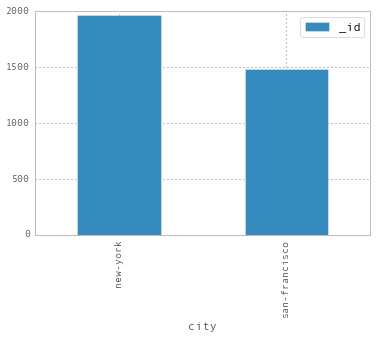

In [112]:
city_listings_df = listing_df.groupby(by=['city']).count()[['_id']]
print city_listings_df
city_listings_df.plot(kind='bar')
plt.show()

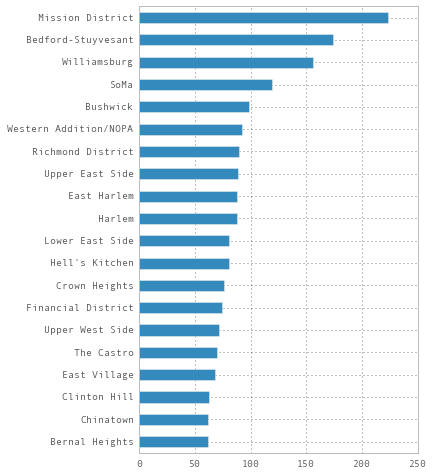

In [160]:
city_colormap = {'new-york':'red', 'san-francisco':'blue'}
listing_df['neighborhood'].value_counts().head(20)[::-1].plot(kind='barh', figsize=(5,8))
plt.show()

Not too surprising, we see "young, hipster" hoods come out up top where people are more open to the sharing economy (top 5)
Interesting is that NYC's UES is so high up! I thought that to be a conservative neighborhood!

Might be interesting to map this against populations or rent

In [173]:
# Of note: There's a plethora of information that we won't be using in the meta content. 
# Calling this out for the next deeper analysis
sample_listing = listing_coll.find_one({'_id':'6078499'})
r = pickle.loads(sample_listing['pickle'])
soup = BeautifulSoup(r.content)
json.loads(soup.find('meta', {'id':"_bootstrap-room_options"})['content'])

{u'airEventData': {u'accuracy_rating': 8,
  u'amenities': [4, 8, 21, 28, 30, 33, 34, 35],
  u'bed_type': u'Real Bed',
  u'cancel_policy': 4,
  u'checkin_rating': 10,
  u'cleanliness_rating': 8,
  u'communication_rating': 10,
  u'friend_count': 0,
  u'guest_satisfaction_overall': 100,
  u'hosting_id': 6078499,
  u'instant_book_possible': False,
  u'location_rating': 10,
  u'page': u'p3',
  u'person_capacity': 1,
  u'picture_count': 3,
  u'price': 75.0,
  u'reponse_rate_shown': 0.615385,
  u'response_time_shown': 34289.0,
  u'room_type': u'Private room',
  u'saved_to_wishlist_count': 34,
  u'time_since_last_calendar_update': 655099.384690748,
  u'utc_offset': -18000,
  u'value_rating': 9,
  u'visible_review_count': 2},
 u'ajaxLwlbContact': u'/rooms/ajax_lwlb_contact/6078499',
 u'calendarLastUpdated': u'2015-06-08',
 u'hostFirstName': u'Carl',
 u'hostingId': 6078499,
 u'isMonthly': False,
 u'locale': u'en',
 u'minNights': 3,
 u'nightly_price': u'$75',
 u'numPhotos': 3,
 u'photoData': [{u'

### How many listings do we have of eact trait?

In [188]:
merged_df = listing_df.merge(right=hood_df[['neighborhood', 'city', 'traits']], on='neighborhood', suffixes=('','_copy'))
merged_df.head()

,_id,address,content,description_clean,description_raw,dt,headline,listing_name,neighborhood,num_saved,price,price_currency,requests_meta,time,url,city,city_copy,traits
0,2066868,"Masonic Avenue, San Francisco (Western Additio...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 00:26:41.821000,"Apartment in San Francisco, United States. Bea...",Peaceful Apartment in the Panhandle,Western Addition/NOPA,Saved 2 times,175,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434414e+09,https://www.airbnb.com/rooms/2066868,san-francisco,san-francisco,[Nightlife]
1,6784213,"Daniel Burnham Court, San Francisco (Western A...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,NaN,NaN,2015-06-16 01:18:44.423000,"Apartment in San Francisco, United States. Sit...",Condo in the Heart of San Francisco,Western Addition/NOPA,Saved 11 times,150,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/6784213,san-francisco,san-francisco,[Nightlife]
2,348714,"Lyon St, San Francisco (Western Addition/NOPA)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space private garden room in large queen a...,\nThe Space\nPrivate garden room in large Quee...,2015-06-16 01:18:52.383000,"Apartment in San Francisco, United States. Pri...",Elegant Victorian Studio,Western Addition/NOPA,Saved 1817 times,170,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/348714,san-francisco,san-francisco,[Nightlife]
3,2315086,"Lyon Street, San Francisco (Western Addition/N...",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space our sunny spacious flat is the secon...,"\nThe Space\nOur sunny, spacious flat is the s...",2015-06-16 01:18:53.807000,"Apartment in San Francisco, United States. NE...","Pacific Heights, 2 rooms & parking!",Western Addition/NOPA,Saved 381 times,135,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/2315086,san-francisco,san-francisco,[Nightlife]
4,708731,"Ellis St, San Francisco (Western Addition/NOPA)",<!DOCTYPE html>\n\n<!--[if lt IE 8]>\n\n<html ...,the space per the new requirement possession o...,\nThe Space\nPer the new requirement: Possess...,2015-06-16 01:18:59.647000,"House in San Francisco, United States. Ground-...",Casa Cancino (STR-0000113),Western Addition/NOPA,Saved 668 times,125,USD,"{u'is_redirect': False, u'status_code': 200, u...",1.434418e+09,https://www.airbnb.com/rooms/708731,san-francisco,san-francisco,[Nightlife]


In [227]:
merged_df['is_artsy'] = ['Artsy' in x for x in merged_df['traits']]
merged_df['is_shopping'] = ['Shopping' in x for x in merged_df['traits']]
merged_df['is_dining'] = ['Dining' in x for x in merged_df['traits']]
merged_df['is_nightlife'] = ['Nightlife' in x for x in merged_df['traits']]

print "OUT OF %s:" % len(merged_df)
print "   %s (%.1f percent) of listings are known for being Artsy" % (sum(merged_df['is_artsy']), (sum(merged_df['is_artsy'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Shopping" % (sum(merged_df['is_shopping']), (sum(merged_df['is_shopping'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Dining" % (sum(merged_df['is_dining']), (sum(merged_df['is_dining'])*1.0/len(merged_df))*100)
print "   %s (%.1f percent) of listings are good for Nightlife" % (sum(merged_df['is_nightlife']), (sum(merged_df['is_nightlife'])*1.0/len(merged_df))*100)

OUT OF 3603:
   1291 (35.8 percent) of listings are known for being Artsy
   1449 (40.2 percent) of listings are good for Shopping
   2173 (60.3 percent) of listings are good for Dining
   1548 (43.0 percent) of listings are good for Nightlife


###Additional Questions:
####Ammenity Differences?
####Price Differences?

In [230]:
for i in listing_df.index:
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27